<a href="https://colab.research.google.com/github/ROARMarketingConcepts/Data-Projects/blob/master/Predicting_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting House Prices- Data Regression Problem

Performed by
Ken Wood

ken@roarmarketingconcepts.com

### We will apply three sklearn regression models to a housing dataset to predict sale prices.  The models are: LinearRegression, DecisionTreeRegressor, and RandomForestRegressor.  Our metric for gauging a model's effectiveness is the Root Mean Square Log Error (RMSLE) of the model predictions $\hat{y}$, as compared with the actual label values $y$ (SalePrice).


### RMSLE = $\sqrt{\dfrac{1}{n}\,\sum_{i=1}^{n}{[(\log(y_i+1) - \log(\hat{y_i}+1)]}\,^2}$



---



### Mount my Google Drive where the train.csv and test.csv datasets are located...

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Install some necessary packages to perform the required analysis...

In [0]:
!pip install -U scikit-learn
!pip install --user --upgrade tables
import pandas as pd
import numpy as np
import sklearn
import scipy

import matplotlib.pyplot as plt
from matplotlib import interactive
plt.rc("font", size=14)
from pylab import scatter, show, legend, xlabel, ylabel

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.2)
Requirement already up-to-date: tables in /usr/local/lib/python3.6/dist-packages (3.4.4)


### Load the train and test datasets...

In [0]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/House Prices: Advanced Regression Techniques/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/House Prices: Advanced Regression Techniques/test.csv')

### Let's look at some properties of the 'train' dataset...

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [0]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Let's compute the correlation matrix for target variable $y$, 'SalePrice'.

In [0]:
corr_matrix = train_data.corr()
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [0]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

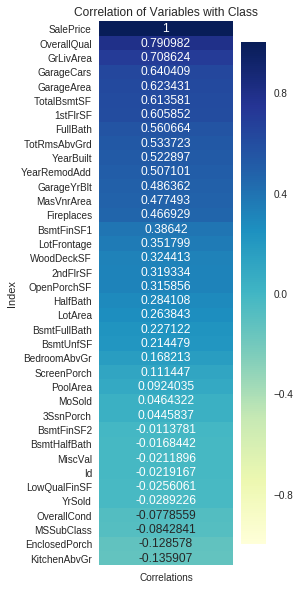

In [0]:
import seaborn as sns

corr = train_data.corr()
corr = corr['SalePrice'].reset_index()
corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(3,10))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Variables with Class")
plt.show()

### Set the 'SalePrice' as the dependent y variable and drop this column from the train_set.

In [0]:
y = train_data['SalePrice']
train_data = train_data.drop('SalePrice',axis=1)
print(train_data.shape)
print(test_data.shape)

(1460, 80)
(1459, 80)


In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

### We will remove the columns that have more than 1000 values missing...

In [0]:
columns = ['Alley','PoolQC','Fence','MiscFeature']

train_data = train_data.drop(columns,axis=1)
test_data = test_data.drop(columns,axis=1)

### Let's identify the columns that contain missing values and how many values are missing...

In [0]:
null_list_train = train_data.columns[train_data.isnull().any()].tolist()

In [0]:
for header in null_list_train:
  print(header,train_data[header].isnull().sum())

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [0]:
null_list_test = test_data.columns[test_data.isnull().any()].tolist()

In [0]:
for header in null_list_test:
  print(header,test_data[header].isnull().sum())

MSZoning 4
LotFrontage 227
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
SaleType 1


### Let's replace the 'NaN' fields in the data object columns with suitable replacement values.

In [0]:
columns = ['BsmtQual','BsmtCond','BsmtExposure','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtFinType1','BsmtFinType2']

for col in columns:
  train_data[col].fillna('NA',inplace=True)
  test_data[col].fillna('NA',inplace=True)

In [0]:
train_data['MasVnrType'].fillna('None',inplace=True)
test_data['MasVnrType'].fillna('None',inplace=True)
train_data['Electrical'].fillna('SBkr',inplace=True)
test_data['Electrical'].fillna('SBkr',inplace=True)

### Now, let's use the 'SimpleImputer' function from sklearn to replace missing values in the numerical variable columns which are 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'. As a first pass, we will impute the median column value for each missing value.

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="median")

In [0]:
columns = ['LotFrontage','MasVnrArea','GarageYrBlt']

In [0]:
def ImputeMissingValues(data,columns):
  
  data_numeric = data[columns]                   # Select the 'LotFrontage','MasVnrArea','GarageYrBlt' columns
  
  for col in columns:
    imputer.fit(data_numeric)
    
  X = imputer.transform(data_numeric)            # Impute new values for the missing values
  data_num = pd.DataFrame(X,columns=columns)
  
  for col in columns:                            # Replace the updated columns in the dataset
    data[col] = data_num[col]
    
  return data                                    # Return the updated dataset

In [0]:
train_data = ImputeMissingValues(train_data,columns)
impute_train_stat = imputer.statistics_
test_data = ImputeMissingValues(test_data,columns)
impute_test_stat = imputer.statistics_
print(impute_train_stat,impute_test_stat)

[  69.    0. 1980.] [  67.    0. 1979.]


In [0]:
null_list_test = test_data.columns[test_data.isnull().any()].tolist()

In [0]:
for header in null_list_test:
  print(header,test_data[header].isnull().sum())

MSZoning 4
Utilities 2
Exterior1st 1
Exterior2nd 1
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
GarageCars 1
GarageArea 1
SaleType 1


### Let's look at the 'MSSubClass' header to see if we can determine the correct missing values for 'MSZoning'.

In [0]:
grouping = test_data.groupby(['MSSubClass'])['MSZoning'].value_counts()
print(grouping)

MSSubClass  MSZoning
20          RL          508
            FV           21
            RM           10
            C (all)       1
            RH            1
30          RM           34
            RL           28
            C (all)       6
            RH            1
40          RL            2
45          RM            4
            RL            2
50          RL           71
            RM           68
            C (all)       3
            RH            1
60          RL          256
            FV           18
            RM            2
70          RM           37
            RL           27
            C (all)       3
75          RM            4
            RL            3
80          RL           57
            RM            3
85          RL           27
            RM            1
90          RL           49
            RM            7
            RH            1
120         RL           58
            RM           19
            FV           14
            RH            4

In [0]:
indices = np.where(test_data['MSZoning'].isna())

for idx in indices:
  MSSubClass_values = test_data['MSSubClass'][idx]
  
MSSubClass_values

455     30
756     20
790     70
1444    20
Name: MSSubClass, dtype: int64

### Based on the above analysis, let's substitute the value 'RL' for all the missing MSZoning values...

In [0]:
test_data['MSZoning'].fillna('RL',inplace=True) 

### A quick look at the 'Utilities' variable...

In [0]:
test_data['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [0]:
test_data['Utilities'].fillna('AllPub',inplace=True)

In [0]:
test_data['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [0]:
test_data['Exterior1st'].fillna('VinylSd',inplace=True)

In [0]:
test_data['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64

In [0]:
test_data['Exterior2nd'].fillna('VinylSd',inplace=True)

In [0]:
test_data['KitchenQual'].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [0]:
test_data['KitchenQual'].fillna('TA',inplace=True)

In [0]:
test_data['Functional'].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [0]:
test_data['Functional'].fillna('Typ',inplace=True)

In [0]:
test_data['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [0]:
test_data['SaleType'].fillna('WD',inplace=True)

In [0]:
null_list_test = test_data.columns[test_data.isnull().any()].tolist()

In [0]:
for header in null_list_test:
  print(header,test_data[header].isnull().sum())

BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageCars 1
GarageArea 1


In [0]:
test_data = ImputeMissingValues(test_data,null_list_test)
impute_test_stat = imputer.statistics_
print(impute_test_stat)

[350.5   0.  460.  988.    0.    0.    2.  480. ]


In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non

### We have now addressed all the missing values in both the train and test datasets. Now we need to code all the categorical variables and then feature-scale everything...

### First, let's separate the numerical and categorical variables so that we can encode them.

In [0]:
train_data_cat = train_data.select_dtypes(include=['object'])
print('Shape of train_data_cat:',train_data_cat.shape)

test_data_cat = test_data.select_dtypes(include=['object'])
print('Shape of test_data_cat:',test_data_cat.shape)

train_data_num = train_data.select_dtypes(exclude=['object'])
print('Shape of train_data_num:',train_data_num.shape)

test_data_num = test_data.select_dtypes(exclude=['object'])
print('Shape of test_data_cat:',test_data_num.shape)

Shape of train_data_cat: (1460, 39)
Shape of test_data_cat: (1459, 39)
Shape of train_data_num: (1460, 37)
Shape of test_data_cat: (1459, 37)


In [0]:
from sklearn.preprocessing import OrdinalEncoder

In [0]:
def CatVariableEncoder(data):
  data=data.values                   # Convert to numpy array
  data=data.reshape(-1,1)
  ordinal_encoder = OrdinalEncoder()
  data_encoded = ordinal_encoder.fit_transform(data)
  return data_encoded

In [0]:
train_data_cat_encoded = CatVariableEncoder(train_data_cat)
train_data_cat_encoded[:10]

array([[128.],
       [121.],
       [135.],
       [ 86.],
       [ 12.],
       [ 84.],
       [ 75.],
       [ 41.],
       [111.],
       [111.]])

In [0]:
test_data_cat_encoded = CatVariableEncoder(test_data_cat)
test_data_cat_encoded[:10]

array([[118.],
       [112.],
       [126.],
       [ 83.],
       [ 11.],
       [ 81.],
       [ 72.],
       [ 97.],
       [ 57.],
       [104.]])

### Sklearn provides a 'OneHotEncoder' function to convert integer categorical values into one-hot vectors. 


In [0]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
train_data_cat_1hot = encoder.fit_transform(train_data_cat_encoded.reshape(-1,1))
test_data_cat_1hot = encoder.fit_transform(test_data_cat_encoded.reshape(-1,1))
print(train_data_cat_1hot,'\n\n',test_data_cat_1hot)

  (0, 128)	1.0
  (1, 121)	1.0
  (2, 135)	1.0
  (3, 86)	1.0
  (4, 12)	1.0
  (5, 84)	1.0
  (6, 75)	1.0
  (7, 41)	1.0
  (8, 111)	1.0
  (9, 111)	1.0
  (10, 2)	1.0
  (11, 6)	1.0
  (12, 67)	1.0
  (13, 42)	1.0
  (14, 159)	1.0
  (15, 159)	1.0
  (16, 28)	1.0
  (17, 71)	1.0
  (18, 151)	1.0
  (19, 119)	1.0
  (20, 71)	1.0
  (21, 151)	1.0
  (22, 107)	1.0
  (23, 66)	1.0
  (24, 157)	1.0
  :	:
  (56915, 77)	1.0
  (56916, 77)	1.0
  (56917, 110)	1.0
  (56918, 71)	1.0
  (56919, 151)	1.0
  (56920, 33)	1.0
  (56921, 151)	1.0
  (56922, 151)	1.0
  (56923, 107)	1.0
  (56924, 19)	1.0
  (56925, 87)	1.0
  (56926, 69)	1.0
  (56927, 71)	1.0
  (56928, 168)	1.0
  (56929, 138)	1.0
  (56930, 151)	1.0
  (56931, 156)	1.0
  (56932, 102)	1.0
  (56933, 17)	1.0
  (56934, 60)	1.0
  (56935, 151)	1.0
  (56936, 151)	1.0
  (56937, 168)	1.0
  (56938, 160)	1.0
  (56939, 112)	1.0 

   (0, 118)	1.0
  (1, 112)	1.0
  (2, 126)	1.0
  (3, 83)	1.0
  (4, 11)	1.0
  (5, 81)	1.0
  (6, 72)	1.0
  (7, 97)	1.0
  (8, 57)	1.0
  (9, 104)	1.0
  (10, 

In [0]:
train_data_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
test_data_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Let's create pipelines for transforming both the numerical and categorical variables. 

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

### Now it would be nice if we could feed a Pandas DataFrame containing non-numerical columns directly into our pipeline, instead of having to first manually extract the numerical columns into a NumPy array. Now we can use the recently-introduced sklearn function **'ColumnTransformer'** to do this work for us.

In [0]:
train_data_num_tr = num_pipeline.fit_transform(train_data_num)
test_data_num_tr = num_pipeline.fit_transform(test_data_num)

In [0]:
from sklearn.compose import ColumnTransformer

num_attribs = list(test_data_num) 
cat_attribs = list(test_data_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [0]:
train_data_prepared = full_pipeline.fit_transform(train_data)
test_data_prepared = full_pipeline.fit_transform(test_data)

In [0]:
train_data_prepared

<1460x287 sparse matrix of type '<class 'numpy.float64'>'
	with 110960 stored elements in Compressed Sparse Row format>

In [0]:
test_data_prepared

<1459x270 sparse matrix of type '<class 'numpy.float64'>'
	with 110883 stored elements in Compressed Sparse Row format>

### We're now ready to train some models!  Let's start the Linear Regression algorithm. 

In [0]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression() 
lin_reg.fit(train_data_prepared,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Let’s measure this regression model’s **RMSLE** on the training set using Scikit-Learn’s 'mean_squared_log_error' function:

In [0]:
from sklearn.metrics import mean_squared_log_error

def Calculate_RMSLE(X,y,model):
  predictions = model.predict(X)
  msle = mean_squared_log_error(y,predictions)
  rmse = np.sqrt(msle)
  return rmse

In [0]:
Calculate_RMSLE(train_data_prepared,y,lin_reg)

0.11148272583065251

### Wow, the RMSLE seems to be fairly low for the train set! Let's perform a cross-validation dividing the training set into 3 folds and see what kind of RMSLE we get...

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

root_mean_square_log_error = make_scorer(rmsle,greater_is_better=False)

lin_reg_rmsle_scores = cross_val_score(lin_reg,train_data_prepared,y,scoring=make_scorer(rmsle), cv=3)
lin_reg_rmsle_scores

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  


array([0.16306742, 0.1835194 , 0.15970886])

In [0]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [0]:
display_scores(lin_reg_rmsle_scores) 

Scores: [0.16306742 0.1835194  0.15970886]
Mean: 0.16876522709818675
Standard deviation: 0.01052249098875687


### After doing a cross validation, we see that the RMSLE for LinearRegression is somewhat higher.  We should probably take a look at some more complex models.

In [0]:
some_predictions = lin_reg.predict(train_data_prepared[:30])
some_labels = y[:30]
    
print(some_predictions,'\n\n',some_labels)

[205969.80926983 206269.25472167 204640.25652642 164240.41384338
 291231.6911148  139645.79525617 280139.49150489 220658.49410713
 139342.05281863 120305.93474517 137249.56442239 397441.63019367
 134206.77297555 228271.20192811 145225.05288586 146721.60507354
 160926.60033377 107952.92082873 147115.83533267 128020.41515838
 329134.44878191 121276.81315423 216726.76208503 140408.11799395
 153039.19897831 260290.02406707 127882.95166099 298667.00537303
 218814.62181593  72426.59363526] 

 0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
20    325300
21    139400
22    230000
23    129900
24    154000
25    256300
26    134800
27    306000
28    207500
29     68500
Name: SalePrice, dtype: int64


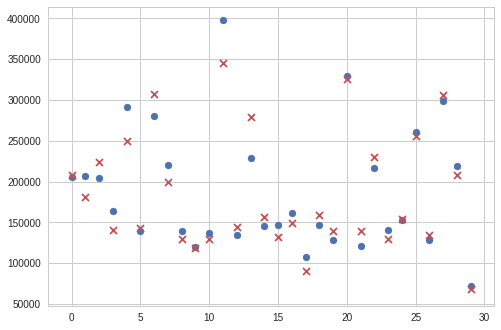

In [0]:
#Creating pandas dataframe from numpy array

df = pd.DataFrame({'Predictions':some_predictions,'Actual':some_labels})
scatter(df.index,some_predictions,marker='o', c='b')
scatter(df.index,some_labels,marker='x', c='r')
plt.figure(); 
# df.plot(); 
# plt.legend(loc='best')

### Let’s train a **DecisionTreeRegressor.** This is a powerful model, capable of finding complex nonlinear relationships in the data.

In [0]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor() 
tree_reg.fit(train_data_prepared,y) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Let's measure the DecisionTreeRegressor model's RMSE...

In [0]:
Calculate_RMSLE(train_data_prepared,y,tree_reg)

0.0

### Wow, RMLSE = 0 for the training set?  Really??!! Let's perform some further tests to determine whether the DecisionTreeRegressor model is badly overfitting the training set.



In [0]:
from sklearn.model_selection import cross_val_score

tree_rmsle_scores = cross_val_score(tree_reg,train_data_prepared,y,scoring=make_scorer(rmsle), cv=3)
tree_rmsle_scores

array([0.20903823, 0.21153032, 0.22872252])

In [0]:
display_scores(tree_rmsle_scores)   

Scores: [0.20903823 0.21153032 0.22872252]
Mean: 0.21643035705312572
Standard deviation: 0.008751215309678768


### Based on these scores, it looks like the DecisionTreeRegressor performs worse than the Linear Regression.

Let's try one more model: the **RandomForestRegressor**. Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. **Building a model on top of many other models is called Ensemble Learning , and it is often a great way to push ML algorithms even further.**


In [0]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state = 42)
forest_reg.fit(train_data_prepared,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
forest_reg.feature_importances_

In [0]:
train_set_RMSLE = Calculate_RMSLE(train_data_prepared,y,forest_reg)
print(train_set_RMSLE)
print('R2 value for train_set:',forest_reg.score(train_data_prepared,y))    # R-squared for the train set

0.06847393415630174
R2 value for train_set: 0.9773459814601912


### Perform a K-fold cross-validation on the training set with K=2

In [0]:
forest_rmse_scores = cross_val_score(forest_reg,train_data_prepared,y,scoring=make_scorer(rmsle), cv=3)
forest_rmse_scores

array([0.14939007, 0.16519537, 0.15936503])

In [0]:
display_scores(forest_rmse_scores)  

Scores: [0.14939007 0.16519537 0.15936503]
Mean: 0.15798348846763646
Standard deviation: 0.006526016392182217


### Now, let's fine tune the Random Forest model by doing a 'GridSearchCV' on the hyperparameters.

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 6 (2X3) combinations of hyperparameters
    {'n_estimators': [100,300],'max_features': [100,200,250]},
    # then try another 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [30,100], 'max_features': [100,200,250]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# train across 3 folds, that's a total of (12+6)*3 = 54 rounds of training 

grid_search = GridSearchCV(forest_reg, param_grid, cv=3,scoring=make_scorer(rmsle),return_train_score=True)
grid_search.fit(train_data_prepared,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [100, 300], 'max_features': [100, 200, 250]}, {'bootstrap': [False], 'n_estimators': [30, 100], 'max_features': [100, 200, 250]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(rmsle), verbose=0)

In [0]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=250, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
cvres = grid_search.cv_results_

In [0]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.14547776169226112 {'max_features': 100, 'n_estimators': 100}
0.14486993502310733 {'max_features': 100, 'n_estimators': 300}
0.14771537567784368 {'max_features': 200, 'n_estimators': 100}
0.1464856664079526 {'max_features': 200, 'n_estimators': 300}
0.14943555979846904 {'max_features': 250, 'n_estimators': 100}
0.14768773715205943 {'max_features': 250, 'n_estimators': 300}
0.14821999280960693 {'bootstrap': False, 'max_features': 100, 'n_estimators': 30}
0.14468181058524318 {'bootstrap': False, 'max_features': 100, 'n_estimators': 100}
0.1509357571122475 {'bootstrap': False, 'max_features': 200, 'n_estimators': 30}
0.14976010077751445 {'bootstrap': False, 'max_features': 200, 'n_estimators': 100}
0.16443967218466365 {'bootstrap': False, 'max_features': 250, 'n_estimators': 30}
0.1636327653044444 {'bootstrap': False, 'max_features': 250, 'n_estimators': 100}


### Fine-tuning the model using Randomized Search

The grid search approach is fine when we are exploring relatively few combinations, but when the hyperparameter search space is large, it is often preferable to use **RandomizedSearchCV** instead.

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=300),
        'max_features': randint(low=1, high=250),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,n_iter=25, cv=5, scoring=make_scorer(rmsle), random_state=42)
rnd_search.fit(train_data_prepared,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5b63d207b8>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5b63d09eb8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=make_scorer(rmsle), verbose=0)

In [0]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=18, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=89, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [0]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.14264994804798933 {'max_features': 103, 'n_estimators': 271}
0.1435521108891897 {'max_features': 107, 'n_estimators': 72}
0.14589300513086498 {'max_features': 189, 'n_estimators': 21}
0.1428060414148441 {'max_features': 103, 'n_estimators': 122}
0.14390453600759182 {'max_features': 211, 'n_estimators': 215}
0.14380358185302078 {'max_features': 75, 'n_estimators': 88}
0.14325951494418993 {'max_features': 117, 'n_estimators': 100}
0.14319222949780858 {'max_features': 104, 'n_estimators': 152}
0.1438686683349553 {'max_features': 131, 'n_estimators': 150}
0.14250341930360202 {'max_features': 53, 'n_estimators': 258}
0.1421302618703874 {'max_features': 88, 'n_estimators': 294}
0.14184747407460957 {'max_features': 130, 'n_estimators': 192}
0.14373300782724902 {'max_features': 188, 'n_estimators': 277}
0.1466933367747866 {'max_features': 161, 'n_estimators': 22}
0.14621322688166657 {'max_features': 236, 'n_estimators': 49}
0.14505999146186868 {'max_features': 219, 'n_estimators': 59}
0.1442

### Using the values provided by 'rnd_search.best_estimator_' (max_features=130 n_estimators=192), let's determine $\hat{y}$ for the train set.

In [0]:
forest_reg = RandomForestRegressor(n_estimators = 130, max_features = 192, random_state=42)
forest_reg.fit(train_data_prepared,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=192, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
train_set_RMSLE = Calculate_RMSLE(train_data_prepared,y,forest_reg)
train_set_RMSLE

0.05853322875461865

In [0]:
forest_reg.predict(test_data_prepared)

ValueError: ignored